In [1]:
from sklearn.datasets import load_iris
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## load data

iris_data = load_iris()

In [3]:
## Check the dataset

dataset = iris_data.data
target = iris_data.target

In [4]:
def mapping(x,target):
    
    """
    This is the mapping function.
    
    argument:
    x -- int of float
    
    return:
    1 if x==target
    0 else
    """
    if (x==target):
        return 1
    else:
        return 0


def buildY(a,target):
    vmap=np.vectorize(mapping)
    return np.squeeze(np.array([vmap(a,i) for i in target]))

In [63]:
Y = buildY(target,range(3))
Y = Y.T


In [4]:
## Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset, target)

In [5]:
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)


(112, 4)
(112,)
(38, 4)
(38,)


In [6]:
## Build pytorch variable

x_train = Variable(torch.FloatTensor(X_train))
x_test = Variable(torch.FloatTensor(X_test))
y_train = Variable(torch.LongTensor(Y_train))
y_test = Variable(torch.LongTensor(Y_test))

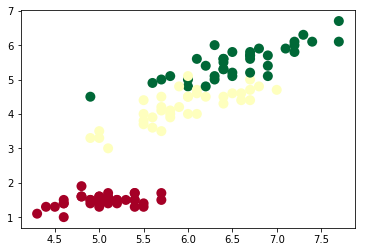

In [7]:
## plot some of the data

plt.scatter(x_train.data.numpy()[:, 0], x_train.data.numpy()[:, 2], c=y_train.data.numpy()[:], s=100, lw=0, cmap='RdYlGn')
plt.show()

In [14]:
## Define a neural net

class Net(torch.nn.Module):
    
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        y = self.out(x)
        return y
    

net = Net(n_feature = 4, n_hidden = 10, n_output = 3)
print (net)

Net(
  (hidden): Linear(in_features=4, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)


In [15]:
loss_fn = torch.nn.CrossEntropyLoss() #calculates the loss
optimizer = torch.optim.Adam(net.parameters(), lr = 0.01)

In [16]:
losslist = []

for t in range(3000):
    
    ## Forward propagation
    pred = net(x_train)
    loss = loss_fn(pred, y_train)
    losslist.append(loss.data)
    
    if (t%100 == 0):
        prediction = pred.data.numpy().argmax(axis = 1)
        accuracy = ((prediction == y_train.data.numpy()).sum())/prediction.shape[0]
        print ("This is the %s iteration"%t,"The train accuracy is: %f"%accuracy)
    
    ## Backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

This is the 0 iteration The train accuracy is: 0.330357
This is the 100 iteration The train accuracy is: 0.982143
This is the 200 iteration The train accuracy is: 0.982143
This is the 300 iteration The train accuracy is: 0.973214
This is the 400 iteration The train accuracy is: 0.973214
This is the 500 iteration The train accuracy is: 0.982143
This is the 600 iteration The train accuracy is: 0.982143
This is the 700 iteration The train accuracy is: 0.982143
This is the 800 iteration The train accuracy is: 0.982143
This is the 900 iteration The train accuracy is: 0.982143
This is the 1000 iteration The train accuracy is: 0.982143
This is the 1100 iteration The train accuracy is: 0.982143
This is the 1200 iteration The train accuracy is: 0.982143
This is the 1300 iteration The train accuracy is: 0.982143
This is the 1400 iteration The train accuracy is: 0.982143
This is the 1500 iteration The train accuracy is: 0.982143
This is the 1600 iteration The train accuracy is: 0.982143
This is t

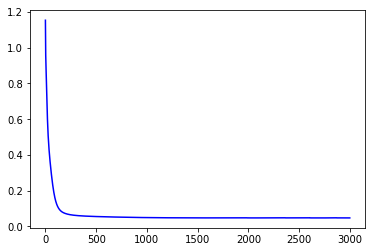

In [18]:
plt.plot(list(range(3000)), losslist, 'b-')
plt.show()

In [32]:
## Let's make prediction!! 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


prediction = net(x_test).data.numpy().argmax(axis = 1)
Y_test = y_test.data.numpy()

print ("The accuracy is: %f"%accuracy_score(Y_test, prediction))
print ("The confusion matrix is: \n%s"%confusion_matrix(Y_test, prediction))

The accuracy is: 1.000000
The confusion matrix is: 
[[12  0  0]
 [ 0 13  0]
 [ 0  0 13]]
